<a href="https://colab.research.google.com/github/Gabriel-Favoretto/reclamacoes-clientes/blob/main/Relatos_de_consumidores_consumidor_gov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
caminho = '/content/drive/MyDrive/Colab Notebooks/reclamacoes_consumidores.csv'

df = pd.read_csv(caminho)
df.head()


,id,empresa,data,local,status,relato,resposta,nota,comentario
0,1,LG Electronics,2024-01-07,Jacuí - MG,Não Resolvido,Com aproximadamente 3 anos de uso deu um probl...,"Bom dia, Gabriel. \n\nCompreendemos o seu rela...",1,"Como relatei, tenho certeza de que se trata de..."
1,2,Hurb - Hotel Urbano,2024-01-07,Imperatriz - MA,Não Resolvido,Solitei desde 2022 o reembolso o qual não obti...,Finalizamos a sua reclamação e você pode encon...,1,Empresa usa apenas mensagens automáticas e não...
2,3,Hurb - Hotel Urbano,2024-01-07,Três Corações - MG,Não Resolvido,No ano de 2021 comprei um pacote de viagem com...,"Olá, viajante! Tudo bem com você?\n\nFinalizam...",1,Mais uma vez não conseguiram resolver o meu pr...
3,4,Latam Airlines (Tam),2024-01-07,Maringá - PR,Resolvido,Estava programado para eu ir em um voo GRU-MOC...,"Olá ,\n\nInformamos que providenciamos os devi...",5,Finalizaram depositand o valor na Latam Wallet.
4,5,Hurb - Hotel Urbano,2024-01-07,Maringá - PR,Não Resolvido,Viagem comprada para 2023. Pedi reembolso. Dis...,"Olá, viajante! Tudo bem com você?\n\nFinalizam...",1,Respostas protocolares como sempre fizeram sem...


In [5]:
df.shape

(204031, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204031 entries, 0 to 204030
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          204031 non-null  int64 
 1   empresa     204031 non-null  object
 2   data        204031 non-null  object
 3   local       204031 non-null  object
 4   status      204031 non-null  object
 5   relato      204031 non-null  object
 6   resposta    204031 non-null  object
 7   nota        204031 non-null  object
 8   comentario  204031 non-null  object
dtypes: int64(1), object(8)
memory usage: 14.0+ MB


In [7]:
# Limpar e preparar os dados
df['data'] = pd.to_datetime(df['data']) # converte a coluna data ara datetime

# converte a nota que esta em texto para número
df['nota'] = pd.to_numeric(df['nota'], errors = 'coerce') # coerce vai tentar transofrmar em número, se tiver algo no meio que não permita ele vira um valor vazio

df['ano_mes'] = df['data'].dt.to_period('M') # me da só o ano e mês desta data e agrupa po mês

reclamacoes_por_mes = df['ano_mes'].value_counts().sort_index() #sort_index para mostrar a ordem cronológica (mês a mês)


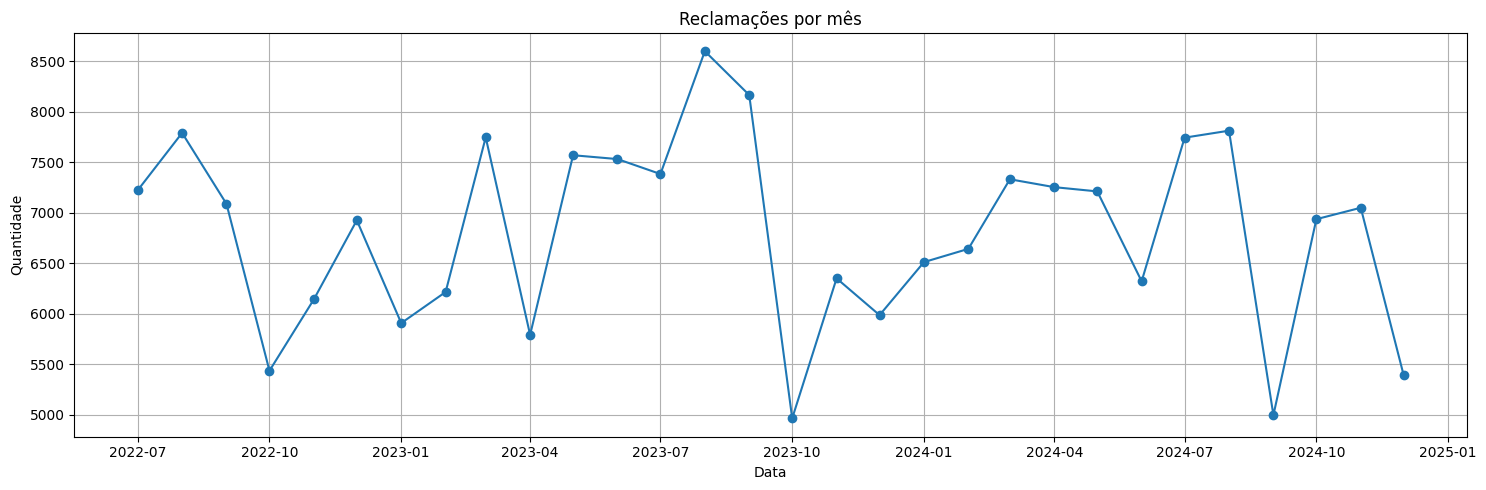

In [8]:
plt.figure(figsize = (15,5))
plt.plot(reclamacoes_por_mes.index.to_timestamp(), reclamacoes_por_mes.values, marker = 'o')

plt.title('Reclamações por mês')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
empresas_top = df['empresa'].value_counts().head(10)
empresas_top

,count
empresa,
Latam Airlines (Tam),13420
Hurb - Hotel Urbano,11756
Serasa Experian,9573
Gol Linhas Aéreas,6047
Tim,5917
Vivo - Telefônica,4926
Azul Linhas Aéreas,4922
123 Milhas,3914
Caixa Econômica Federal,3887


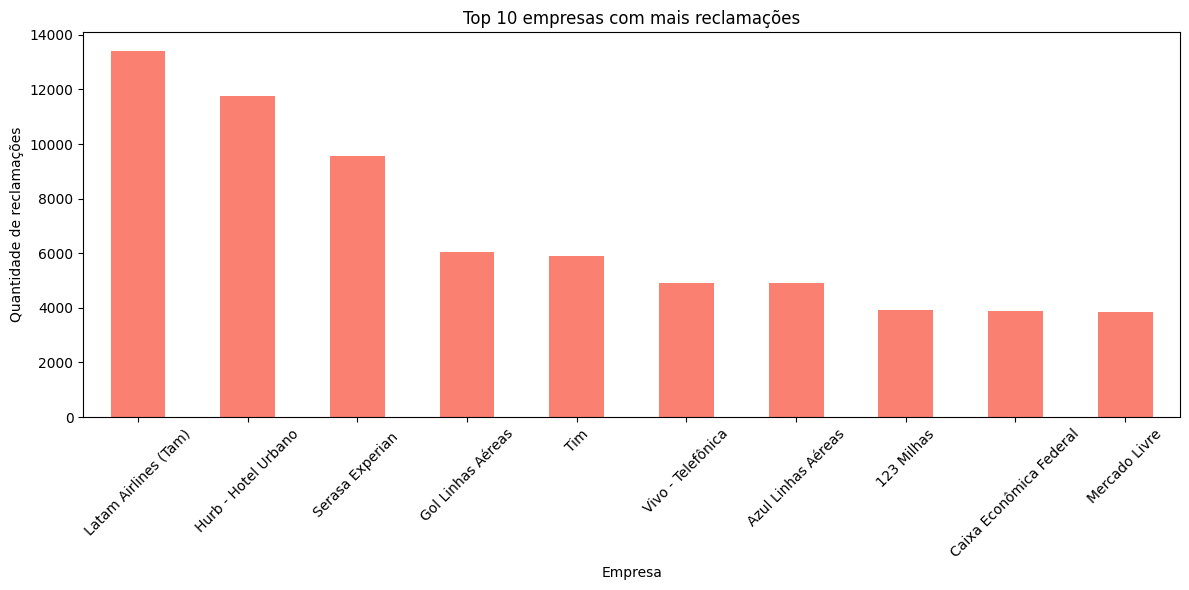

In [10]:
plt.figure(figsize = (12,6))
empresas_top.plot(kind = 'bar', color = 'salmon')

plt.title('Top 10 empresas com mais reclamações')
plt.ylabel('Quantidade de reclamações')
plt.xlabel('Empresa')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [11]:
top10 = empresas_top.index
df_top10 = df[df['empresa'].isin(top10)]
df_top10.head()

,id,empresa,data,local,status,relato,resposta,nota,comentario,ano_mes
1,2,Hurb - Hotel Urbano,2024-01-07,Imperatriz - MA,Não Resolvido,Solitei desde 2022 o reembolso o qual não obti...,Finalizamos a sua reclamação e você pode encon...,1.0,Empresa usa apenas mensagens automáticas e não...,2024-01
2,3,Hurb - Hotel Urbano,2024-01-07,Três Corações - MG,Não Resolvido,No ano de 2021 comprei um pacote de viagem com...,"Olá, viajante! Tudo bem com você?\n\nFinalizam...",1.0,Mais uma vez não conseguiram resolver o meu pr...,2024-01
3,4,Latam Airlines (Tam),2024-01-07,Maringá - PR,Resolvido,Estava programado para eu ir em um voo GRU-MOC...,"Olá ,\n\nInformamos que providenciamos os devi...",5.0,Finalizaram depositand o valor na Latam Wallet.,2024-01
4,5,Hurb - Hotel Urbano,2024-01-07,Maringá - PR,Não Resolvido,Viagem comprada para 2023. Pedi reembolso. Dis...,"Olá, viajante! Tudo bem com você?\n\nFinalizam...",1.0,Respostas protocolares como sempre fizeram sem...,2024-01
5,6,Serasa Experian,2024-01-07,Rialma - GO,Resolvido,O meu nome está negativado em duas agências de...,"Oi, JOAO. Tudo bem?\n\n\nAcabamos de responder...",5.0,<não há comentários do consumidor>,2024-01


In [12]:
# Resolução em porcentagem de cada empresa
resolucao = (
    df_top10
      .groupby(['empresa', 'status'])
      .size()
      .unstack(fill_value=0)
)
resolucao_pct = (resolucao.div(resolucao.sum(axis=1), axis=0)*100).round(1)
print(resolucao_pct)

status                   Não Resolvido  Resolvido
empresa                                          
123 Milhas                        68.5       31.5
Azul Linhas Aéreas                 4.5       95.5
Caixa Econômica Federal           36.3       63.7
Gol Linhas Aéreas                 20.4       79.6
Hurb - Hotel Urbano               94.1        5.9
Latam Airlines (Tam)              16.9       83.1
Mercado Livre                     39.6       60.4
Serasa Experian                   40.2       59.8
Tim                                6.5       93.5
Vivo - Telefônica                  5.3       94.7


In [13]:
# Calcular a nota média que os clientes deram para cada empresa
nota_media = (
    df_top10
    .groupby('empresa')['nota']
    .mean()
    .round(2)
    .sort_values(ascending = False)
)
nota_media

,nota
empresa,
Azul Linhas Aéreas,4.68
Vivo - Telefônica,4.58
Tim,4.55
Latam Airlines (Tam),4.13
Gol Linhas Aéreas,4.08
Serasa Experian,3.47
Caixa Econômica Federal,3.30
Mercado Livre,3.07
123 Milhas,2.23


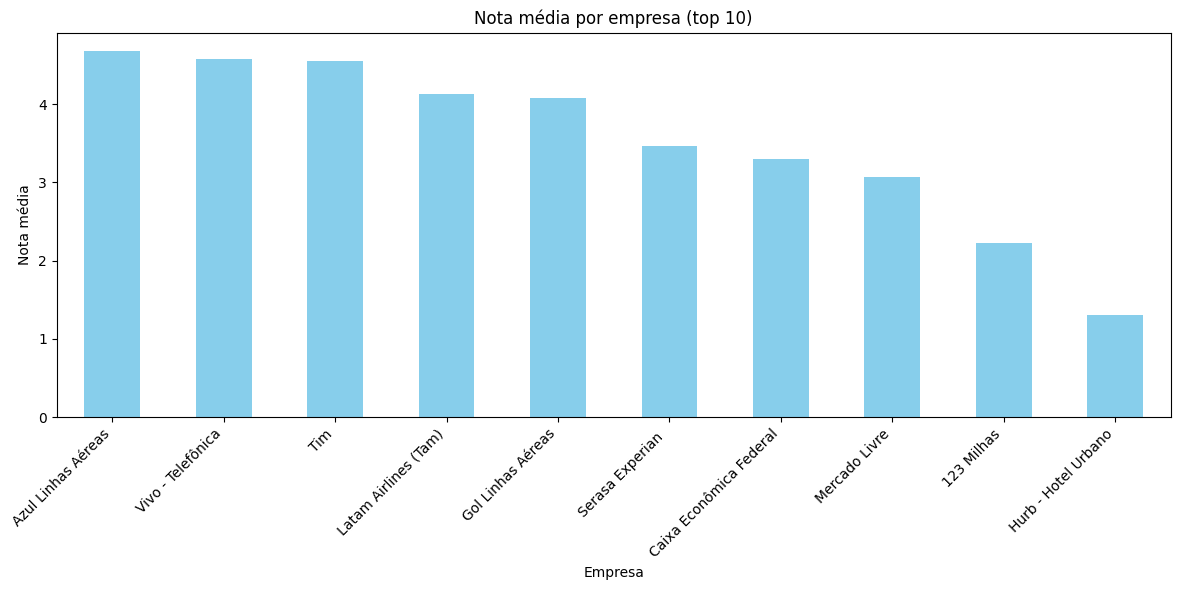

In [14]:
plt.figure(figsize = (12,6))
nota_media.plot(kind = 'bar', color = 'skyblue')

plt.title('Nota média por empresa (top 10)')
plt.xlabel('Empresa')
plt.ylabel('Nota média')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [16]:
print(df_metrics)

                         pct_resolvido  nota_media
empresa                                           
123 Milhas                        31.5        2.23
Azul Linhas Aéreas                95.5        4.68
Caixa Econômica Federal           63.7        3.30
Gol Linhas Aéreas                 79.6        4.08
Hurb - Hotel Urbano                5.9        1.30
Latam Airlines (Tam)              83.1        4.13
Mercado Livre                     60.4        3.07
Serasa Experian                   59.8        3.47
Tim                               93.5        4.55
Vivo - Telefônica                 94.7        4.58


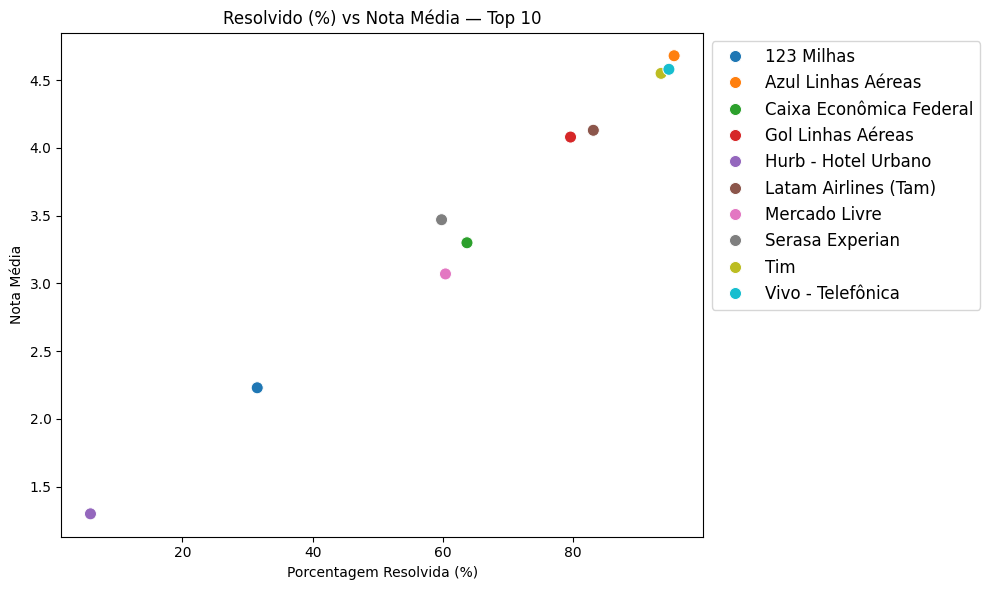

In [17]:
# Prepara os dados
df_plot = df_metrics.reset_index().rename(columns={'index':'empresa'})

# Desenha o scatter com legenda automática
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_plot,
    x='pct_resolvido',
    y='nota_media',
    hue='empresa',      # cada empresa vira uma cor
    s=75,              # tamanho dos pontos
    palette='tab10',    # paleta de 10 cores
)

plt.title('Resolvido (%) vs Nota Média — Top 10')
plt.xlabel('Porcentagem Resolvida (%)')
plt.ylabel('Nota Média')
plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize = 12)
plt.tight_layout()
plt.show()


In [18]:
corr = df_metrics['pct_resolvido'].corr(df_metrics['nota_media'])
print(f'Correlação entre % resolvido e nota média: {corr:.2f}')

Correlação entre % resolvido e nota média: 0.99


Uma correlação de 0.99 indica uma relação quase perfeita entre resolver reclamações e receber nota alta


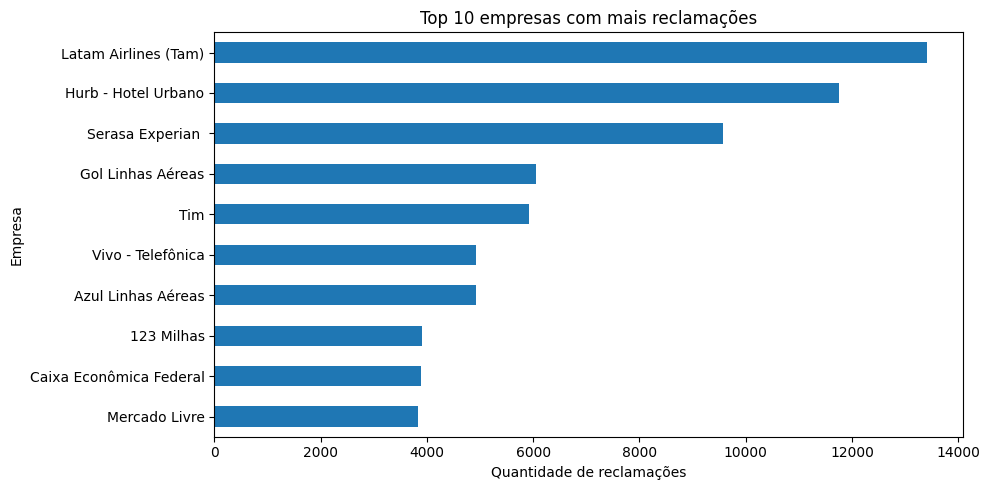

In [25]:
empresas_top = df['empresa'].value_counts().head(10)
plt.figure(figsize = (10,5))
empresas_top.plot(kind = 'barh')
plt.gca().invert_yaxis() # barra maior fica em cima
plt.title('Top 10 empresas com mais reclamações')
plt.xlabel('Quantidade de reclamações')
plt.ylabel('Empresa')
plt.tight_layout()
plt.show()

In [29]:
resolucao = df_top10.groupby(['empresa', 'status']).size().unstack(fill_value=0)
resolucao_pct = (resolucao.div(resolucao.sum(axis = 1), axis = 0)*100).round(1)
print(resolucao_pct)

status                   Não Resolvido  Resolvido
empresa                                          
123 Milhas                        68.5       31.5
Azul Linhas Aéreas                 4.5       95.5
Caixa Econômica Federal           36.3       63.7
Gol Linhas Aéreas                 20.4       79.6
Hurb - Hotel Urbano               94.1        5.9
Latam Airlines (Tam)              16.9       83.1
Mercado Livre                     39.6       60.4
Serasa Experian                   40.2       59.8
Tim                                6.5       93.5
Vivo - Telefônica                  5.3       94.7


<Figure size 1000x500 with 0 Axes>

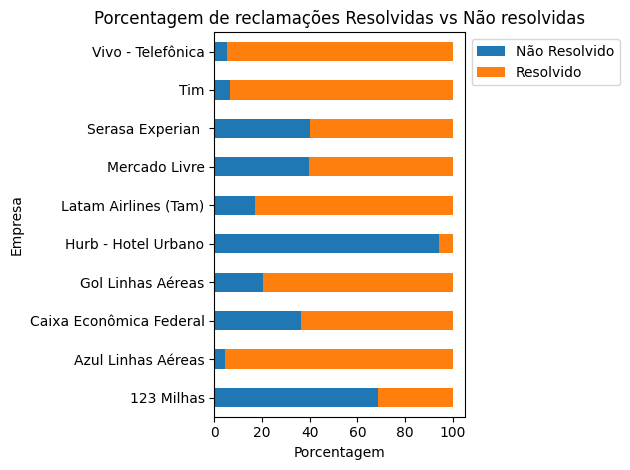

In [39]:
plt.figure(figsize = (10,5))
resolucao_pct.plot(kind = 'barh', stacked = True)
plt.title('Porcentagem de reclamações Resolvidas vs Não resolvidas')
plt.xlabel('Porcentagem')
plt.ylabel('Empresa')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()
